**Análisis Exploratorio Descriptivo sobre Rendimientos de Establecimientos de Salud PBA(periodo 2018-2020)**

In [1]:
# Primero, instalamos las librerias necesarias de Python

!pip install pandas
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Una vez instaladas, las importamos, por lo que a partir de ahora van a recibir nombres abreviados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# En este punto importamos la carpeta
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargamos los datos del archivo Excel
df = pd.read_csv("/content/drive/MyDrive/IMD/TP_FINAL/rendimientos-hospitalarios_2018-2020.csv")

In [5]:
# Verificamos los primeros 5 registros de la base de datos 
df.head()

,anio,mes,region_sanitaria,municipio_nombre,municipio_id,establecimiento,dependencia,consultas_odontologicas,consultas_medicas,cosultas_paramedicas,...,pacientes_dias_hospital_dia,promedio_cama_disponible,dias_estada,promedio_dias_estada,altas,defunciones,egresos,porcentaje_ocupacional,giro_cama,tasa_mortalidad
0,2020,12,I,Adolfo Alsina,6007,00700014 Hosp. Local Gral. San Martin,Municipal,345.0,9477.0,1268.0,...,NaN,30.0,740.0,3.03,236.0,8.0,244.0,75.0,8.13,3.28
1,2020,12,I,Adolfo Alsina,6007,00700022 Unid. Sanit. San Miguel Arcangel,Municipal,119.0,484.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,12,I,Adolfo Alsina,6007,00700057 Unid. Sanit. Colonia Lapin,Municipal,NaN,36.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,12,I,Adolfo Alsina,6007,00700065 Unid. Sanit. Dr. J.C. Senepart,Municipal,NaN,141.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,12,I,Adolfo Alsina,6007,00700073 Unid. Sanit. Murature,Municipal,NaN,23.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Verificamos números de filas y columnas
print(df.shape)

(78290, 23)


In [7]:
# Información sobre las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78290 entries, 0 to 78289
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   anio                         78290 non-null  int64  
 1   mes                          78290 non-null  int64  
 2   region_sanitaria             78290 non-null  object 
 3   municipio_nombre             78290 non-null  object 
 4   municipio_id                 78290 non-null  int64  
 5   establecimiento              78290 non-null  object 
 6   dependencia                  78290 non-null  object 
 7   consultas_odontologicas      41629 non-null  float64
 8   consultas_medicas            74076 non-null  float64
 9   cosultas_paramedicas         59604 non-null  float64
 10  interconsultas               3140 non-null   object 
 11  dias_camas_disponibles       13550 non-null  float64
 12  pacientes_dias               13550 non-null  float64
 13  pacientes_dias_h

In [8]:
# Estadísticas descriptivas de las columnas
print(df.describe())

               anio           mes  municipio_id  consultas_odontologicas  \
count  78290.000000  78290.000000  78290.000000             41629.000000   
mean    2019.005812      6.509771   6441.569038               466.313171   
std        0.815931      3.452413    245.388616              2427.810688   
min     2018.000000      1.000000   6007.000000                 0.000000   
25%     2018.000000      4.000000   6252.000000                35.000000   
50%     2019.000000      7.000000   6441.000000               123.000000   
75%     2020.000000     10.000000   6638.000000               323.000000   
max     2020.000000     12.000000   6882.000000             87823.000000   

       consultas_medicas  cosultas_paramedicas  dias_camas_disponibles  \
count       74076.000000          59604.000000            13550.000000   
mean         2814.376600            454.755134             2198.437343   
std          6192.433524            880.629491             2798.276666   
min             0.0

In [9]:
# Verificamos si hay valores nulos o faltantes en nuestra Base de datos
print(df.isnull().sum())

anio                               0
mes                                0
region_sanitaria                   0
municipio_nombre                   0
municipio_id                       0
establecimiento                    0
dependencia                        0
consultas_odontologicas        36661
consultas_medicas               4214
cosultas_paramedicas           18686
interconsultas                 75150
dias_camas_disponibles         64740
pacientes_dias                 64740
pacientes_dias_hospital_dia    77623
promedio_cama_disponible       64816
dias_estada                    64740
promedio_dias_estada           67135
altas                          64740
defunciones                    64740
egresos                        64740
porcentaje_ocupacional         64792
giro_cama                      64816
tasa_mortalidad                67135
dtype: int64


In [10]:
# Ahora que sabemos cuantos valores nulos existen en nuestra BD...
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

# averiguamos que porcentaje representa el total de dichos valores nulos 
percent_missing = (total_missing / total_cells) * 100
print(percent_missing)

51.61789778249207


En base a este análisis sabemos que el 51% de los datos registables en nuestra BD no se encuentran disponibles.

Se muestran los valores faltantes.

In [11]:
subset_data = df.loc[:, 'consultas_odontologicas':'tasa_mortalidad'].head()
subset_data

,consultas_odontologicas,consultas_medicas,cosultas_paramedicas,interconsultas,dias_camas_disponibles,pacientes_dias,pacientes_dias_hospital_dia,promedio_cama_disponible,dias_estada,promedio_dias_estada,altas,defunciones,egresos,porcentaje_ocupacional,giro_cama,tasa_mortalidad
0,345.0,9477.0,1268.0,NaN,930.0,699.0,NaN,30.0,740.0,3.03,236.0,8.0,244.0,75.0,8.13,3.28
1,119.0,484.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Verificar el número de filas y columnas 
print(df.shape)

(78290, 23)


#**GRÁFICOS**

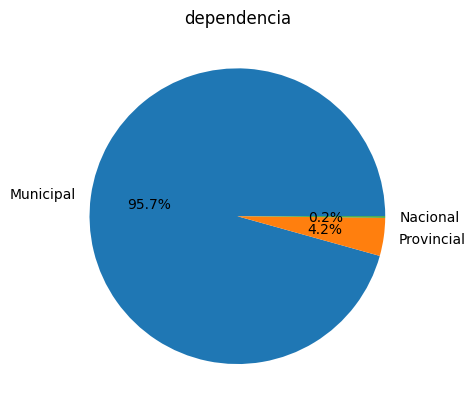

In [13]:
# Graficamos el porcentaje de dependencias de los Estableciminetos Sanitarios

# contar el número de casos en cada valor único de la columna "dependencia"
count = df['dependencia'].value_counts()

# crear un gráfico de torta con el número de casos en cada valor único de la columna "dependencia"
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('dependencia')
plt.show()

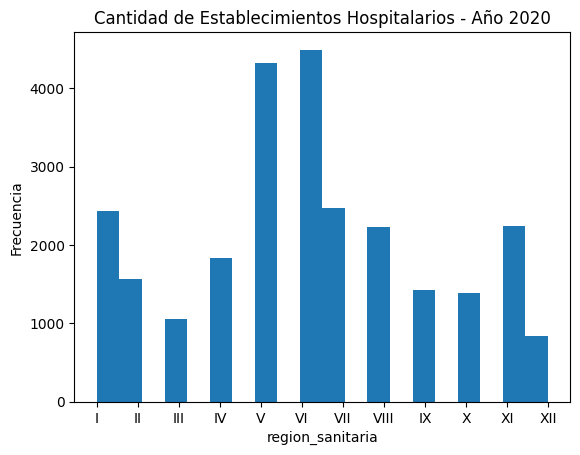

In [14]:
# Creamos un histograma que represente la cantidad de Establecimientos por Region Sanitaria

year = 2020  # Año específico que deseas filtrar

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df[df['anio'] == year] 

plt.hist(df_filtered['region_sanitaria'], bins=20)
plt.xlabel('region_sanitaria')
plt.ylabel('Frecuencia')
plt.title(f'Cantidad de Establecimientos Hospitalarios - Año {year}')
plt.show()


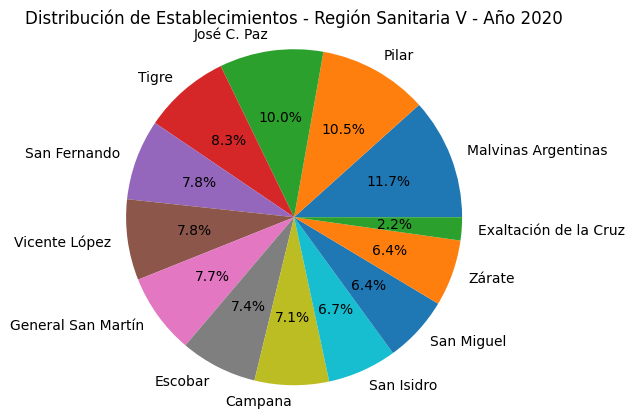

In [15]:
# Porcentajes de distribucián de los Establecimientos dentro de la Región Sanitaria V

region_sanitaria = 'V'  # Región Sanitaria específica que deseas filtrar
year = 2020  # Año específico que deseas filtrar

# Filtrar el DataFrame para incluir solo los municipios de la Región Sanitaria V y del año 2020
df_filtered = df[(df['region_sanitaria'] == region_sanitaria) & (df['anio'] == year)]

# Contar la cantidad de municipios por categoría
counts = df_filtered['municipio_nombre'].value_counts()

# Crear el gráfico de torta
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f'Distribución de Establecimientos - Región Sanitaria {region_sanitaria} - Año {year}')
plt.axis('equal')
plt.show()

Se analiza el rendimiento hospitalario por Región Sanitaria, para visualizar cuál fue el rendimiento entre las diferentes regiones.

In [16]:
rendimiento_por_region = df.groupby('region_sanitaria').agg({
    'consultas_medicas': 'sum',
    'dias_camas_disponibles': 'sum'
})


In [17]:
rendimiento_por_region['rendimiento_hospitalario'] = rendimiento_por_region['consultas_medicas'] / rendimiento_por_region['dias_camas_disponibles']


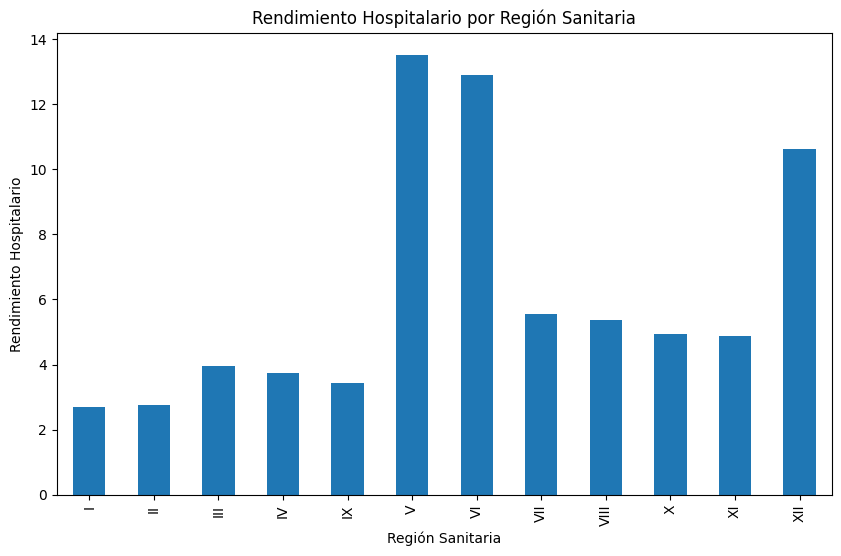

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rendimiento_por_region['rendimiento_hospitalario'].plot(kind='bar')
plt.xlabel('Región Sanitaria')
plt.ylabel('Rendimiento Hospitalario')
plt.title('Rendimiento Hospitalario por Región Sanitaria')
plt.show()


Mediante el gráfico, se observa que las Regiónes V y VI presentan mayor desarrollo, al contar con mayor número de establecimientos.

#ELIMINACÓN DE NAN POR VARIABLE ESPECÍFICA

#Análisis de Consultas Odontológicas

In [19]:
# Eliminar las filas con valores nulos en la columna "consultas_odontologicas"
df_sin_nulos = df.dropna(subset=['consultas_odontologicas'])

# Verificar el resultado
print(df_sin_nulos.head())


   anio  mes region_sanitaria municipio_nombre  municipio_id  \
0  2020   12                I    Adolfo Alsina          6007   
1  2020   12                I    Adolfo Alsina          6007   
6  2020   12                I    Adolfo Alsina          6007   
8  2020   12                I    Adolfo Alsina          6007   
9  2020   12                I    Adolfo Alsina          6007   

                                     establecimiento dependencia  \
0              00700014 Hosp. Local Gral. San Martin   Municipal   
1          00700022 Unid. Sanit. San Miguel Arcangel   Municipal   
6             00700111 Unid. Sanit. Bo. Arturo Illia   Municipal   
8  00700135 Hosp. Munic. Dr. Demetrio Carmelo Loy...   Municipal   
9               00700146 Hosp. Munic. Dr. Noe Yarcho   Municipal   

   consultas_odontologicas  consultas_medicas  cosultas_paramedicas  ...  \
0                    345.0             9477.0                1268.0  ...   
1                    119.0              484.0         

In [20]:
# Mostrar los nuevos valores de la columna "consultas_odontologicas" en pantalla
print(df_sin_nulos['consultas_odontologicas'])

0         345.0
1         119.0
6         228.0
8         243.0
9         216.0
          ...  
78274       0.0
78278     469.0
78279     200.0
78286     369.0
78288    1567.0
Name: consultas_odontologicas, Length: 41629, dtype: float64


In [21]:
print(df_sin_nulos.isnull().sum())

anio                               0
mes                                0
region_sanitaria                   0
municipio_nombre                   0
municipio_id                       0
establecimiento                    0
dependencia                        0
consultas_odontologicas            0
consultas_medicas                993
cosultas_paramedicas            4636
interconsultas                 38837
dias_camas_disponibles         32760
pacientes_dias                 32760
pacientes_dias_hospital_dia    41431
promedio_cama_disponible       32773
dias_estada                    32760
promedio_dias_estada           33181
altas                          32760
defunciones                    32760
egresos                        32760
porcentaje_ocupacional         32768
giro_cama                      32773
tasa_mortalidad                33181
dtype: int64


<ipython-input-22-5182bdae350f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_sin_nulos[df['anio'] == year]


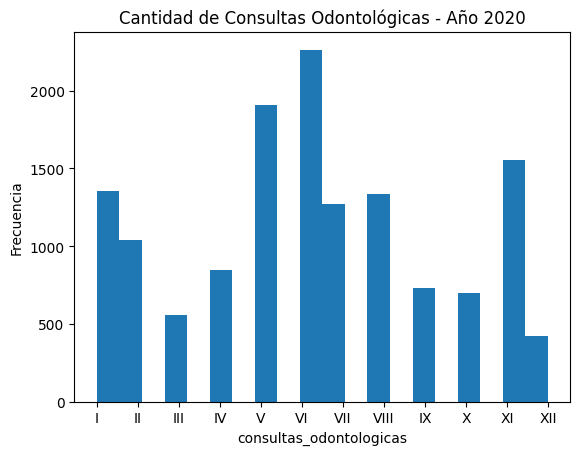

In [22]:
year = 2020  # Año específico que deseas filtrar

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df_sin_nulos[df['anio'] == year] 

plt.hist(df_filtered['region_sanitaria'], bins=20)
plt.xlabel('consultas_odontologicas')
plt.ylabel('Frecuencia')
plt.title(f'Cantidad de Consultas Odontológicas - Año {year}')
plt.show()

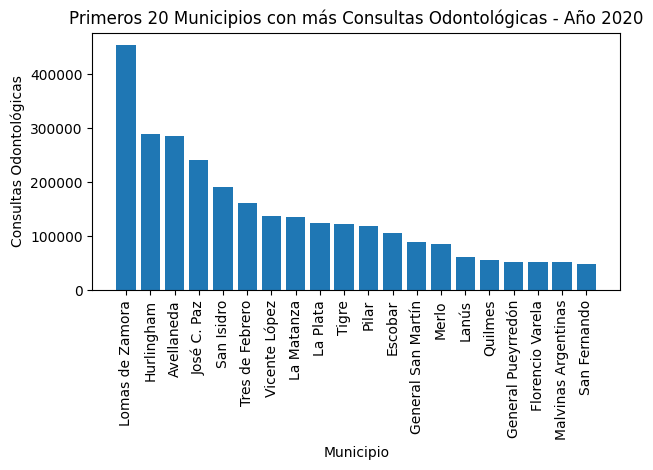

In [23]:
year = 2020  # Año específico que deseas filtrar
top_municipios = 20  # Número de municipios que deseas incluir en el histograma

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df_sin_nulos[df_sin_nulos['anio'] == year]

# Agrupar por municipio y calcular el total de consultas odontológicas por municipio
df_grouped = df_filtered.groupby('municipio_nombre')['consultas_odontologicas'].sum().reset_index()

# Ordenar los municipios por el total de consultas odontológicas en orden descendente
df_top_municipios = df_grouped.sort_values('consultas_odontologicas', ascending=False).head(top_municipios)

# Graficar el histograma de los municipios seleccionados
plt.bar(df_top_municipios['municipio_nombre'], df_top_municipios['consultas_odontologicas'])
plt.xlabel('Municipio')
plt.ylabel('Consultas Odontológicas')
plt.title(f'Primeros {top_municipios} Municipios con más Consultas Odontológicas - Año {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Análisis de Consultas Médicas

In [24]:
# Eliminar las filas con valores nulos en la columna "consultas_medicas"
df_sin_nulos = df.dropna(subset=['consultas_medicas'])

# Verificar el resultado
print(df_sin_nulos.head())

   anio  mes region_sanitaria municipio_nombre  municipio_id  \
0  2020   12                I    Adolfo Alsina          6007   
1  2020   12                I    Adolfo Alsina          6007   
2  2020   12                I    Adolfo Alsina          6007   
3  2020   12                I    Adolfo Alsina          6007   
4  2020   12                I    Adolfo Alsina          6007   

                             establecimiento dependencia  \
0      00700014 Hosp. Local Gral. San Martin   Municipal   
1  00700022 Unid. Sanit. San Miguel Arcangel   Municipal   
2        00700057 Unid. Sanit. Colonia Lapin   Municipal   
3    00700065 Unid. Sanit. Dr. J.C. Senepart   Municipal   
4             00700073 Unid. Sanit. Murature   Municipal   

   consultas_odontologicas  consultas_medicas  cosultas_paramedicas  ...  \
0                    345.0             9477.0                1268.0  ...   
1                    119.0              484.0                  47.0  ...   
2                      NaN

In [25]:
print(df_sin_nulos['consultas_medicas'])

0        9477.0
1         484.0
2          36.0
3         141.0
4          23.0
          ...  
78285    2102.0
78286    1089.0
78287    4369.0
78288    8005.0
78289    3351.0
Name: consultas_medicas, Length: 74076, dtype: float64


In [26]:
print(df_sin_nulos.isnull().sum())

anio                               0
mes                                0
region_sanitaria                   0
municipio_nombre                   0
municipio_id                       0
establecimiento                    0
dependencia                        0
consultas_odontologicas        33440
consultas_medicas                  0
cosultas_paramedicas           15164
interconsultas                 70983
dias_camas_disponibles         63234
pacientes_dias                 63234
pacientes_dias_hospital_dia    73577
promedio_cama_disponible       63310
dias_estada                    63234
promedio_dias_estada           63973
altas                          63234
defunciones                    63234
egresos                        63234
porcentaje_ocupacional         63286
giro_cama                      63310
tasa_mortalidad                63973
dtype: int64


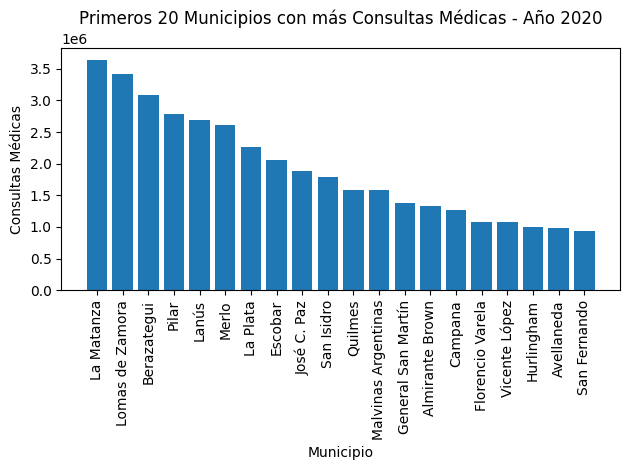

In [27]:
year = 2020  # Año específico que deseas filtrar
top_municipios = 20  # Número de municipios que deseas incluir en el histograma

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df_sin_nulos[df_sin_nulos['anio'] == year]

# Agrupar por municipio y calcular el total de consultas odontológicas por municipio
df_grouped = df_filtered.groupby('municipio_nombre')['consultas_medicas'].sum().reset_index()

# Ordenar los municipios por el total de consultas odontológicas en orden descendente
df_top_municipios = df_grouped.sort_values('consultas_medicas', ascending=False).head(top_municipios)

# Graficar el histograma de los municipios seleccionados
plt.bar(df_top_municipios['municipio_nombre'], df_top_municipios['consultas_medicas'])
plt.xlabel('Municipio')
plt.ylabel('Consultas Médicas')
plt.title(f'Primeros {top_municipios} Municipios con más Consultas Médicas - Año {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Análisis de Consultas Paramédicas

In [28]:
# Eliminar las filas con valores nulos en la columna "cosultas_paramedicas"
df_sin_nulos = df.dropna(subset=['cosultas_paramedicas'])

# Verificar el resultado
print(df_sin_nulos.head())

   anio  mes region_sanitaria municipio_nombre  municipio_id  \
0  2020   12                I    Adolfo Alsina          6007   
1  2020   12                I    Adolfo Alsina          6007   
6  2020   12                I    Adolfo Alsina          6007   
7  2020   12                I    Adolfo Alsina          6007   
8  2020   12                I    Adolfo Alsina          6007   

                                     establecimiento dependencia  \
0              00700014 Hosp. Local Gral. San Martin   Municipal   
1          00700022 Unid. Sanit. San Miguel Arcangel   Municipal   
6             00700111 Unid. Sanit. Bo. Arturo Illia   Municipal   
7               00700120 Unid. Sanit. Villa Goldberg   Municipal   
8  00700135 Hosp. Munic. Dr. Demetrio Carmelo Loy...   Municipal   

   consultas_odontologicas  consultas_medicas  cosultas_paramedicas  ...  \
0                    345.0             9477.0                1268.0  ...   
1                    119.0              484.0         

In [29]:
print(df_sin_nulos['cosultas_paramedicas'])

0        1268.0
1          47.0
6          64.0
7         104.0
8         349.0
          ...  
78282      50.0
78283      22.0
78284     115.0
78286     284.0
78288    1026.0
Name: cosultas_paramedicas, Length: 59604, dtype: float64


In [30]:
print(df_sin_nulos.isnull().sum())

anio                               0
mes                                0
region_sanitaria                   0
municipio_nombre                   0
municipio_id                       0
establecimiento                    0
dependencia                        0
consultas_odontologicas        22611
consultas_medicas                692
cosultas_paramedicas               0
interconsultas                 56643
dias_camas_disponibles         49444
pacientes_dias                 49444
pacientes_dias_hospital_dia    59156
promedio_cama_disponible       49520
dias_estada                    49444
promedio_dias_estada           49983
altas                          49444
defunciones                    49444
egresos                        49444
porcentaje_ocupacional         49496
giro_cama                      49520
tasa_mortalidad                49983
dtype: int64


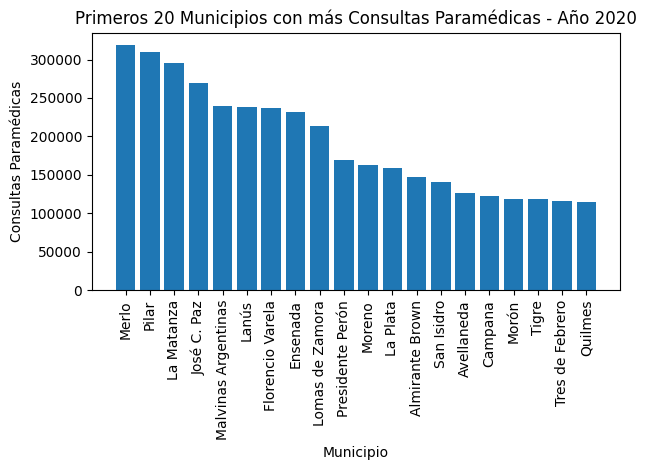

In [31]:
year = 2020  # Año específico que deseas filtrar
top_municipios = 20  # Número de municipios que deseas incluir en el histograma

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df_sin_nulos[df_sin_nulos['anio'] == year]

# Agrupar por municipio y calcular el total de consultas odontológicas por municipio
df_grouped = df_filtered.groupby('municipio_nombre')['cosultas_paramedicas'].sum().reset_index()

# Ordenar los municipios por el total de consultas odontológicas en orden descendente
df_top_municipios = df_grouped.sort_values('cosultas_paramedicas', ascending=False).head(top_municipios)

# Graficar el histograma de los municipios seleccionados
plt.bar(df_top_municipios['municipio_nombre'], df_top_municipios['cosultas_paramedicas'])
plt.xlabel('Municipio')
plt.ylabel('Consultas Paramédicas')
plt.title(f'Primeros {top_municipios} Municipios con más Consultas Paramédicas - Año {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Análisis de Interconsultas

In [32]:
# Eliminar las filas con valores nulos en la columna "interconsultas"
df_sin_nulos = df.dropna(subset=['interconsultas'])

# Verificar el resultado
print(df_sin_nulos.head())

     anio  mes region_sanitaria municipio_nombre  municipio_id  \
18   2020   12                I     Bahía Blanca          6056   
206  2020   12               II   Carlos Casares          6147   
207  2020   12               II   Carlos Casares          6147   
208  2020   12               II   Carlos Casares          6147   
224  2020   12               II   Carlos Tejedor          6154   

                                       establecimiento dependencia  \
18   05600034 Hosp. Munic. de Agudos Dr. Leonidas L...   Municipal   
206            14700025 Hosp. Local Esp. Mat. Infantil   Municipal   
207           14700041 Hosp. Munic. Dr. Julio F. Ramos   Municipal   
208  14700050 Unid. Sanit. y Asilo Dr. Albert Schwe...   Municipal   
224                15400041 Hosp. Munic. J. H. Ressano   Municipal   

     consultas_odontologicas  consultas_medicas  cosultas_paramedicas  ...  \
18                      69.0             7596.0                 170.0  ...   
206                    161

In [33]:
print(df_sin_nulos['interconsultas'])

18       564
206      105
207      450
208       11
224      331
        ... 
78176    105
78182    114
78212      0
78233    842
78281     23
Name: interconsultas, Length: 3140, dtype: object


In [34]:
print(df_sin_nulos.isnull().sum())

anio                              0
mes                               0
region_sanitaria                  0
municipio_nombre                  0
municipio_id                      0
establecimiento                   0
dependencia                       0
consultas_odontologicas         348
consultas_medicas                47
cosultas_paramedicas            179
interconsultas                    0
dias_camas_disponibles           21
pacientes_dias                   21
pacientes_dias_hospital_dia    3080
promedio_cama_disponible         34
dias_estada                      21
promedio_dias_estada            119
altas                            21
defunciones                      21
egresos                          21
porcentaje_ocupacional           21
giro_cama                        34
tasa_mortalidad                 119
dtype: int64


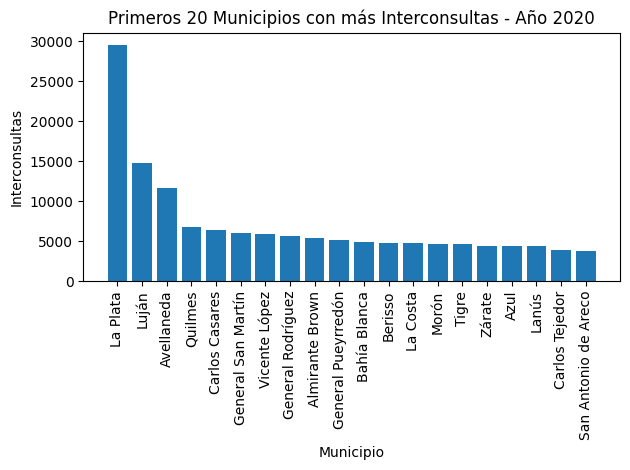

In [35]:
year = 2020  # Año específico que deseas filtrar
top_municipios = 20  # Número de municipios que deseas incluir en el histograma

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df_sin_nulos[df_sin_nulos['anio'] == year]

# Filtrar valores no numéricos en la columna "interconsultas"
df_filtered = df_filtered[pd.to_numeric(df_filtered['interconsultas'], errors='coerce').notna()]

# Convertir los datos de la columna "interconsultas" a valores numéricos
df_filtered['interconsultas'] = pd.to_numeric(df_filtered['interconsultas'])

# Agrupar por municipio y calcular el total de interconsultas por municipio
df_grouped = df_filtered.groupby('municipio_nombre')['interconsultas'].sum().reset_index()

# Ordenar los municipios por el total de interconsultas en orden descendente
df_top_municipios = df_grouped.sort_values('interconsultas', ascending=False).head(top_municipios)

# Graficar el histograma de los municipios seleccionados
plt.bar(df_top_municipios['municipio_nombre'], df_top_municipios['interconsultas'])
plt.xlabel('Municipio')
plt.ylabel('Interconsultas')
plt.title(f'Primeros {top_municipios} Municipios con más Interconsultas - Año {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Comparación de los municipios que presentaron mayor cantidad de interconsultas entre el año 2018 y 2020.

<ipython-input-36-b1304ae6826b>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_top_municipios_2018['municipio_nombre'], rotation=90)
<ipython-input-36-b1304ae6826b>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_top_municipios_2020['municipio_nombre'], rotation=90)


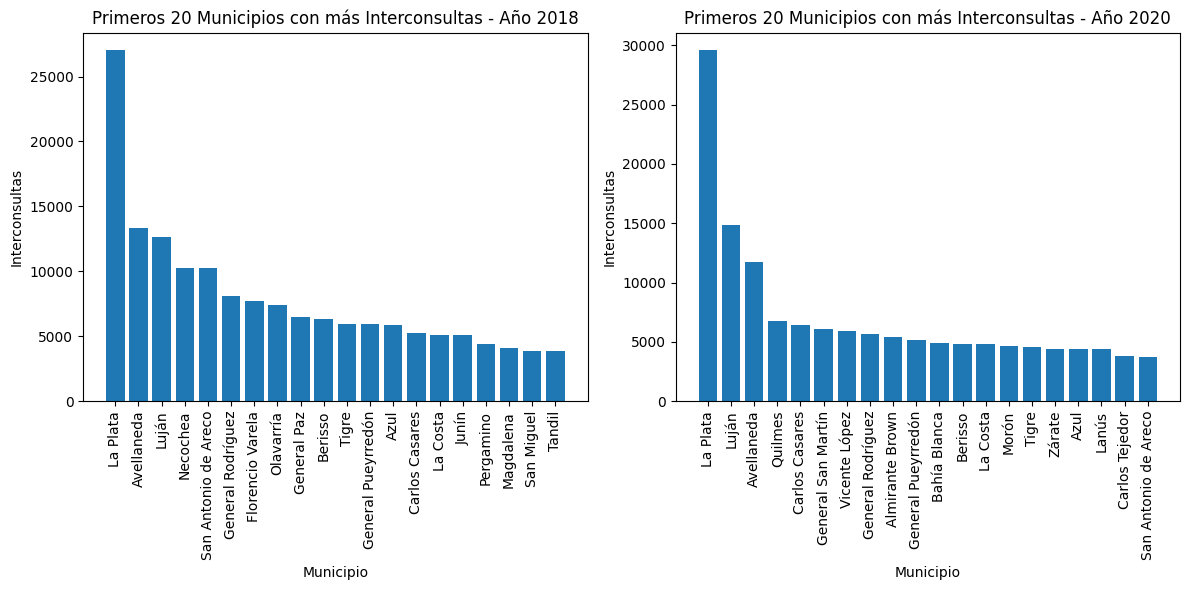

In [36]:
year_2018 = 2018
year_2020 = 2020

# Filtrar el DataFrame para incluir solo el año especificado (2018)
df_filtered_2018 = df_sin_nulos[df_sin_nulos['anio'] == year_2018]
df_filtered_2018 = df_filtered_2018[pd.to_numeric(df_filtered_2018['interconsultas'], errors='coerce').notna()]
df_filtered_2018['interconsultas'] = pd.to_numeric(df_filtered_2018['interconsultas'])
df_grouped_2018 = df_filtered_2018.groupby('municipio_nombre')['interconsultas'].sum().reset_index()
df_top_municipios_2018 = df_grouped_2018.sort_values('interconsultas', ascending=False).head(top_municipios)

# Filtrar el DataFrame para incluir solo el año especificado (2020)
df_filtered_2020 = df_sin_nulos[df_sin_nulos['anio'] == year_2020]
df_filtered_2020 = df_filtered_2020[pd.to_numeric(df_filtered_2020['interconsultas'], errors='coerce').notna()]
df_filtered_2020['interconsultas'] = pd.to_numeric(df_filtered_2020['interconsultas'])
df_grouped_2020 = df_filtered_2020.groupby('municipio_nombre')['interconsultas'].sum().reset_index()
df_top_municipios_2020 = df_grouped_2020.sort_values('interconsultas', ascending=False).head(top_municipios)

# Crear una figura de subplots para mostrar ambos gráficos en la misma imagen
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Graficar el histograma para el año 2018
axes[0].bar(df_top_municipios_2018['municipio_nombre'], df_top_municipios_2018['interconsultas'])
axes[0].set_xlabel('Municipio')
axes[0].set_ylabel('Interconsultas')
axes[0].set_title(f'Primeros {top_municipios} Municipios con más Interconsultas - Año {year_2018}')
axes[0].set_xticklabels(df_top_municipios_2018['municipio_nombre'], rotation=90)

# Graficar el histograma para el año 2020
axes[1].bar(df_top_municipios_2020['municipio_nombre'], df_top_municipios_2020['interconsultas'])
axes[1].set_xlabel('Municipio')
axes[1].set_ylabel('Interconsultas')
axes[1].set_title(f'Primeros {top_municipios} Municipios con más Interconsultas - Año {year_2020}')
axes[1].set_xticklabels(df_top_municipios_2020['municipio_nombre'], rotation=90)

# Ajustar el espacio entre subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Interconsultas')

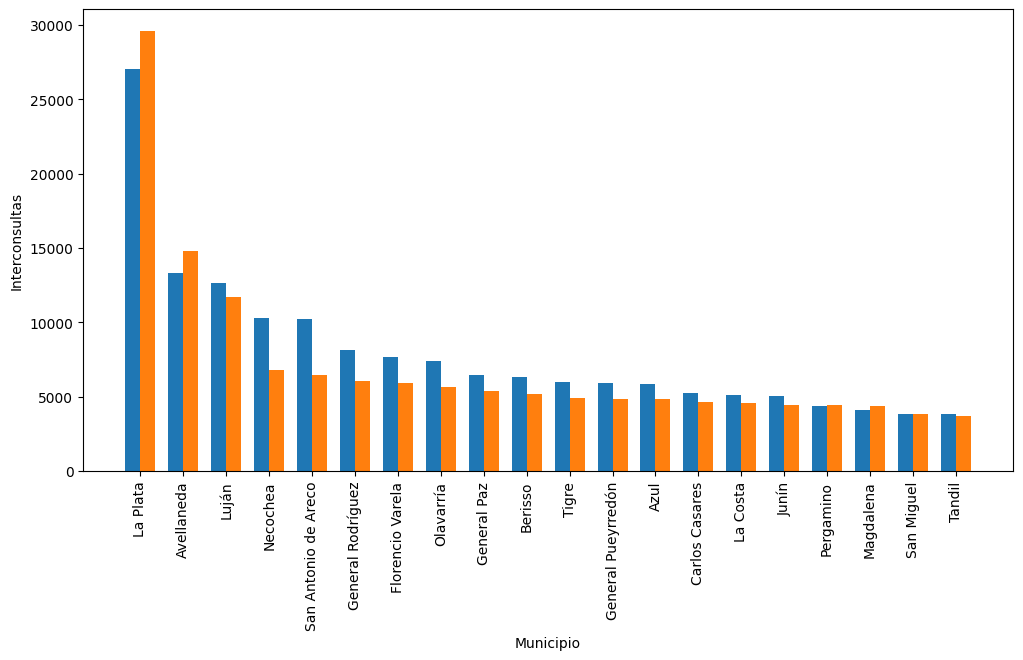

In [37]:
year_2018 = 2018
year_2020 = 2020
top_municipios = 20

# Filtrar el DataFrame para incluir solo el año especificado (2018)
df_filtered_2018 = df_sin_nulos[df_sin_nulos['anio'] == year_2018]
df_filtered_2018 = df_filtered_2018[pd.to_numeric(df_filtered_2018['interconsultas'], errors='coerce').notna()]
df_filtered_2018['interconsultas'] = pd.to_numeric(df_filtered_2018['interconsultas'])
df_grouped_2018 = df_filtered_2018.groupby('municipio_nombre')['interconsultas'].sum().reset_index()
df_top_municipios_2018 = df_grouped_2018.sort_values('interconsultas', ascending=False).head(top_municipios)

# Filtrar el DataFrame para incluir solo el año especificado (2020)
df_filtered_2020 = df_sin_nulos[df_sin_nulos['anio'] == year_2020]
df_filtered_2020 = df_filtered_2020[pd.to_numeric(df_filtered_2020['interconsultas'], errors='coerce').notna()]
df_filtered_2020['interconsultas'] = pd.to_numeric(df_filtered_2020['interconsultas'])
df_grouped_2020 = df_filtered_2020.groupby('municipio_nombre')['interconsultas'].sum().reset_index()
df_top_municipios_2020 = df_grouped_2020.sort_values('interconsultas', ascending=False).head(top_municipios)

# Obtener los nombres de los municipios para el eje x
municipios_2018 = df_top_municipios_2018['municipio_nombre']
municipios_2020 = df_top_municipios_2020['municipio_nombre']

# Obtener los valores de las interconsultas para el eje y
interconsultas_2018 = df_top_municipios_2018['interconsultas']
interconsultas_2020 = df_top_municipios_2020['interconsultas']

# Crear un array con los índices de los municipios
indices = np.arange(len(municipios_2018))

# Ancho de las barras
ancho_barras = 0.35

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar las barras para el año 2018
ax.bar(indices, interconsultas_2018, width=ancho_barras, label=f'Año {year_2018}')

# Graficar las barras para el año 2020
ax.bar(indices + ancho_barras, interconsultas_2020, width=ancho_barras, label=f'Año {year_2020}')

# Etiquetas de los municipios en el eje x
ax.set_xticks(indices + ancho_barras / 2)
ax.set_xticklabels(municipios_2018, rotation=90)

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel('Municipio')
ax.set_ylabel('Interconsultas')

# Análisis Promedio días de estada


In [38]:
# Eliminar las filas con valores nulos en la columna "promedio_dias_estada"
df_promedio_dias_estada = df.dropna(subset=['promedio_dias_estada'])

# Verificar el resultado
print(df_promedio_dias_estada.head())

    anio  mes region_sanitaria        municipio_nombre  municipio_id  \
0   2020   12                I           Adolfo Alsina          6007   
8   2020   12                I           Adolfo Alsina          6007   
9   2020   12                I           Adolfo Alsina          6007   
11  2020   12                I  Adolfo Gonzales Chaves          6014   
12  2020   12                I  Adolfo Gonzales Chaves          6014   

                                      establecimiento dependencia  \
0               00700014 Hosp. Local Gral. San Martin   Municipal   
8   00700135 Hosp. Munic. Dr. Demetrio Carmelo Loy...   Municipal   
9                00700146 Hosp. Munic. Dr. Noe Yarcho   Municipal   
11           01400022 Hosp. Local Gral. A. Elicagaray   Municipal   
12               01400049 Unid. Sanit. Dr. F. Madueno   Municipal   

    consultas_odontologicas  consultas_medicas  cosultas_paramedicas  ...  \
0                     345.0             9477.0                1268.0  ...  

In [39]:
print(df_promedio_dias_estada['promedio_dias_estada'])

0          3.03
8          1.98
9          3.49
11        62.45
12       749.31
          ...  
78224      3.55
78225      2.24
78233      6.86
78281      4.31
78288      5.47
Name: promedio_dias_estada, Length: 11155, dtype: float64


In [40]:
print(df_promedio_dias_estada.isnull().sum())

anio                               0
mes                                0
region_sanitaria                   0
municipio_nombre                   0
municipio_id                       0
establecimiento                    0
dependencia                        0
consultas_odontologicas         2707
consultas_medicas               1052
cosultas_paramedicas            1534
interconsultas                  8134
dias_camas_disponibles             0
pacientes_dias                     0
pacientes_dias_hospital_dia    10891
promedio_cama_disponible          24
dias_estada                        0
promedio_dias_estada               0
altas                              0
defunciones                        0
egresos                            0
porcentaje_ocupacional             0
giro_cama                         24
tasa_mortalidad                    0
dtype: int64


In [41]:
print(df_promedio_dias_estada.shape)

(11155, 23)


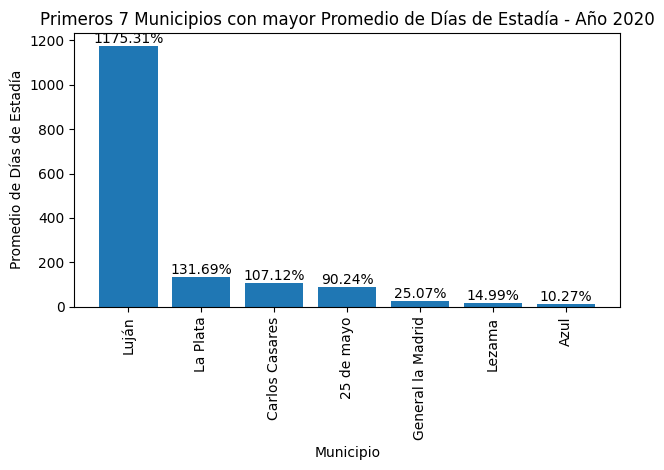

In [42]:
#graficamos el promedio de dias de estadia


import pandas as pd
import matplotlib.pyplot as plt

year = 2020  # Año específico que deseas filtrar
top_municipios = 7  # Número de municipios que deseas incluir en el histograma

# Filtrar el DataFrame para incluir solo el año especificado
df_filtered = df_sin_nulos[df_sin_nulos['anio'] == year]

# Filtrar valores no numéricos en la columna "interconsultas"
df_filtered = df_filtered[pd.to_numeric(df_filtered['promedio_dias_estada'], errors='coerce').notna()]

# Convertir los datos de la columna "interconsultas" a valores numéricos
df_filtered['promedio_dias_estada'] = pd.to_numeric(df_filtered['promedio_dias_estada'])

# Agrupar por municipio y calcular el promedio de días de estadía por municipio
df_grouped = df_filtered.groupby('municipio_nombre')['promedio_dias_estada'].mean().reset_index()

# Ordenar los municipios por el promedio de días de estadía en orden descendente
df_top_municipios = df_grouped.sort_values('promedio_dias_estada', ascending=False).head(top_municipios)

# Graficar el histograma de los municipios seleccionados
plt.bar(df_top_municipios['municipio_nombre'], df_top_municipios['promedio_dias_estada'])
plt.xlabel('Municipio')
plt.ylabel('Promedio de Días de Estadía')
plt.title(f'Primeros {top_municipios} Municipios con mayor Promedio de Días de Estadía - Año {year}')
plt.xticks(rotation=90)

# Agregar etiquetas con el porcentaje exacto de días de estadía
for i, value in enumerate(df_top_municipios['promedio_dias_estada']):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#**Análisis univariado y detección de outliers**

En este punto generaremos nuesto boxplot, es decir un gráfico donde se utilizan los cuartiles para representar la distribucion de los datos.


<Axes: xlabel='promedio_dias_estada'>

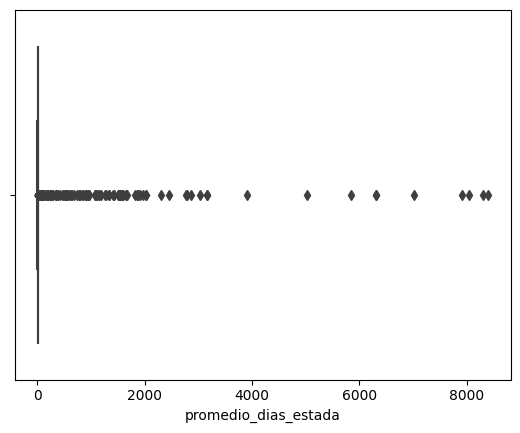

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
sns.boxplot(x=df_sin_nulos['promedio_dias_estada'])

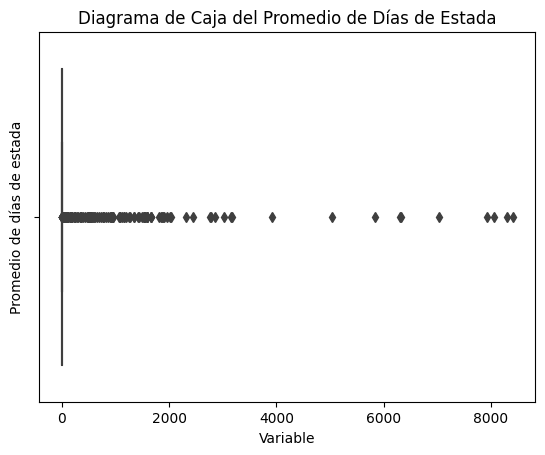

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trama del diagrama de caja
sns.boxplot(x=df_sin_nulos['promedio_dias_estada'])

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Variable')
plt.ylabel('Promedio de días de estada')
plt.title('Diagrama de Caja del Promedio de Días de Estada')

# Mostrar el gráfico
plt.show()


El boxplot nos muestra el rango intercuartílico, que abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), lo que representa el 50% central de los datos. La línea en el medio del rectángulo en el gráfico representa la mediana (segundo cuartil, Q2).


In [45]:
# Vamos a prepararnos para detectar outliers

Q1 = df_sin_nulos['promedio_dias_estada'].quantile(0.25)
Q3 = df_sin_nulos['promedio_dias_estada'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3.5400000000000005


In [46]:
Q1

3.28

In [47]:
Q3

6.82

Utilizamos para identificar los valores atípicos, el IQR bajo el criterio del IQR*1.5, es decir, si un valor esta por encima de Q3 + 1.5*IQR o por debajo de Q1 -1.5*IQR, se considera un posible outlier.

In [48]:
Q1 = df_sin_nulos['promedio_dias_estada'].quantile(0.25)
Q3 = df_sin_nulos['promedio_dias_estada'].quantile(0.75)
IQR = Q3 - Q1

df_sin_outliers = df_sin_nulos[~((df_sin_nulos['promedio_dias_estada'] < (Q1 - 1.5*IQR)) | (df_sin_nulos['promedio_dias_estada'] > (Q3 + 1.5*IQR)))]

print(df_sin_outliers.shape)


(2880, 23)


In [49]:
Q1 = df_sin_nulos['promedio_dias_estada'].quantile(0.25)
Q3 = df_sin_nulos['promedio_dias_estada'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Límite inferior:", lower_limit)
print("Límite superior:", upper_limit)


Límite inferior: -2.0300000000000007
Límite superior: 12.13


Ahora, con las cosas un poco más "limpias", vamos a una representación o tablero que describa los análisis fundamentales sobre las variables. Para esto importamos un sub paquete de pandas llamado pandas_profiling, utilizando la función ProfileReport, que genera un reporte bastante exhaustivo.

In [50]:
pip install pandas-profiling[notebook]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f62766ccaa8125b9c7453ae52a29286c1c733277d89ea44b9fce514b2dfb9277
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb

In [51]:
from pandas_profiling import ProfileReport

df_promedio_dias_estada = df_sin_outliers[['promedio_dias_estada']]
report = ProfileReport(df_promedio_dias_estada)
report.to_notebook_iframe()

<ipython-input-51-79bfe64dd9e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Por último,  nos permite guardar el reporte.


In [52]:
report.to_file("/content/drive/MyDrive/IMD/TP_FINAL/Reporte_promedio_dias_estada.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]